In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [5]:
df = pd.read_csv("Automobile.csv")
print(df.head())
print(df.info())


                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         304.0       150.0   
4                ford torino  17.0          8         302.0       140.0   

   weight  acceleration  model_year origin  
0    3504          12.0          70    usa  
1    3693          11.5          70    usa  
2    3436          11.0          70    usa  
3    3433          12.0          70    usa  
4    3449          10.5          70    usa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2 

In [7]:
df = df.drop(['name'], axis=1)
df['price_category'] = df['horsepower'].apply(lambda x: 'Cheap' if x < 100 else 'Expensive')  # Example condition
df = df.drop(['horsepower'], axis=1)
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print(df.head())

    mpg  cylinders  displacement  weight  acceleration  model_year  origin  \
0  18.0          8         307.0    3504          12.0          70       2   
1  15.0          8         350.0    3693          11.5          70       2   
2  18.0          8         318.0    3436          11.0          70       2   
3  16.0          8         304.0    3433          12.0          70       2   
4  17.0          8         302.0    3449          10.5          70       2   

   price_category  
0               1  
1               1  
2               1  
3               1  
4               1  


In [9]:
X = df.drop('price_category', axis=1)
y = df['price_category']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
y_pred = model.predict(X_test)
print("Model training complete.")
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

Model training complete.
Training set score: 0.85
Test set score: 0.89


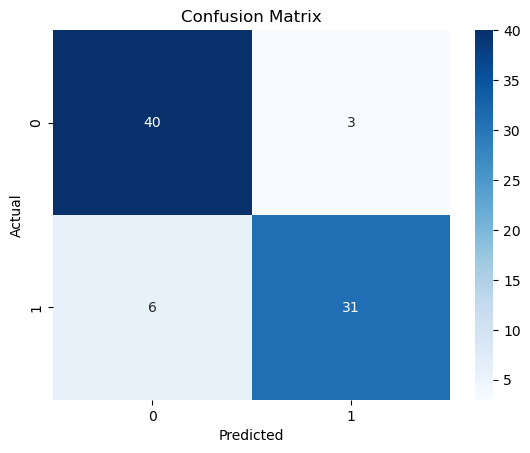

In [15]:


# Step 5: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 6: Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()